<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_findKCoreTres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
import seaborn as sns


# Importa datos

In [273]:
df = pd.read_csv('https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/cust_seg.csv')
df =df.drop(columns=['Unnamed: 0','Customer Id'])
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [274]:
df['rangeAge'] = pd.cut(x=df['Age'], bins=[15,20,25,30,35,40,45,50,55,60],labels=[1,2,3,4,5,6,7,8,9]) 
df['rangeYearsEmployed'] = pd.cut(x=df['Years Employed'], bins=[-1,0,3,6,9,12,15,18,21,24,27,30,33,36],labels=[1,2,3,4,5,6,7,8,9,10,11,12,13])
df[['rangeAge']] = df[['rangeAge']].apply(lambda col:pd.Categorical(col).codes)
df[['rangeYearsEmployed']] = df[['rangeYearsEmployed']].apply(lambda col:pd.Categorical(col).codes)
df['rangeYearsEmployed']=df['rangeYearsEmployed'].astype(float)
df['rangeAge']=df['rangeAge'].astype(float)
df['Edu']=df['Edu'].astype(float)
df['Income']=df['Income'].astype(float)
del df['Age']
del df['Years Employed']

*Se eliminan las cols 'Unnamed: 0','Customer Id', ya que no tienen ninguna influencia en los datos*

# Visualizacion de Datos

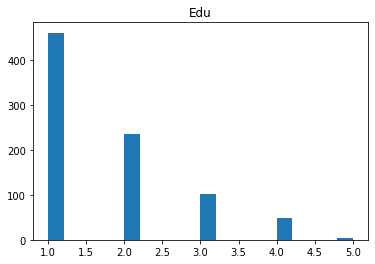

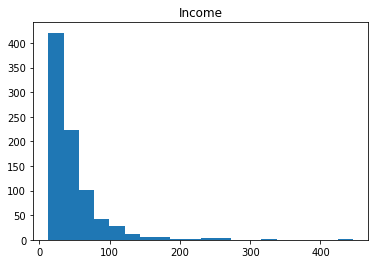

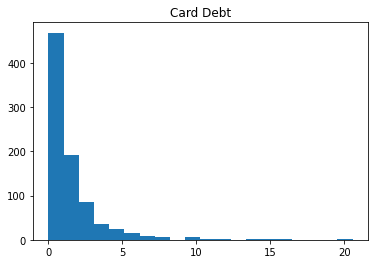

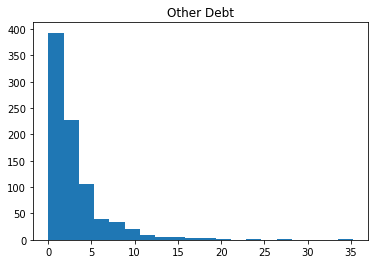

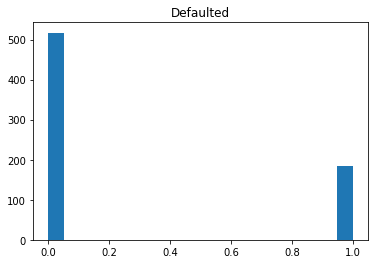

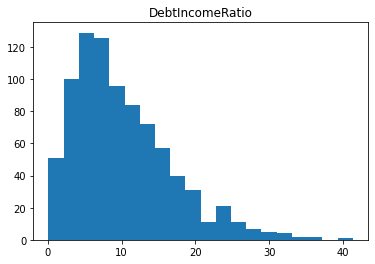

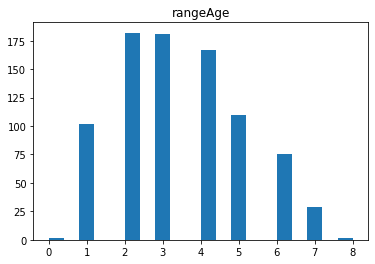

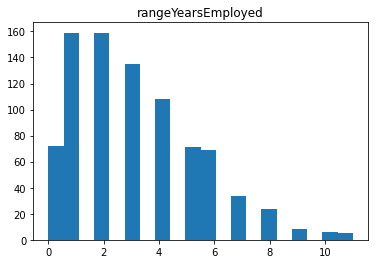

Se puede observar una correlacion mas directa entre los ingresos (Income) y Años en el empleo (Years Employeed)



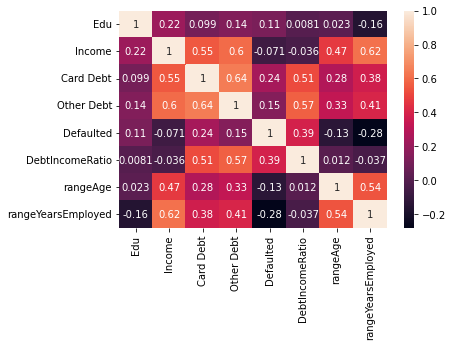

In [275]:
lista=list(df.columns)
for idx, column in enumerate(lista):    
    fig = plt.figure()        
    ax1 = fig.add_subplot(1,1,1)
    ax1.hist(df[column], bins=20)
    ax1.set_title(column)    
    plt.show()
idx = len(df) 
cols = df.columns
corr = df.corr() 
sns.heatmap(corr, annot = True) 
print('Se puede observar una correlacion mas directa entre los ingresos (Income) y Años en el empleo (Years Employeed)\n')

*Podemos ver que el rango de edad de la muestra va desde los 19/20 a los 57/58 aprox, con un peak en las edades de entre 29/32*

*Podemos ver que la mayoria de la muestra tiene educacion con ID 1*

*Podemos ver que el rango de años trabajando de la muestra va desde los 0/33 aprox, con un peak entre los 0/2 años trabajando*

*Podemos ver que el rango de ingresos de la muestra va desde los 0/450 aprox, con un peak de ingresos entre los 0/35 aprox*

*Podemos ver que el rango de tarjetas de debito de la muestra va desde los 0/23 aprox, con un peak de tarjetas entre los 0/2 aprox*

*Podemos ver que el rango de otras tarjetas de debito de la muestra va desde los 0/38 aprox, con un peak de tarjetas entre los 0/2 aprox*

*Podemos ver que la mayoria de la muestra tiene un incumplimiento con ID 0*

*Podemos ver que el rango de DebtIncomeRatio de la muestra va desde los 0/43 aprox, con un peak de entre los 5/8 aprox*


# Exploracion de Datos


In [276]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')
print('los tipos de datos son:\n')
df.info()
print('---------------------------')
df.describe().round(3)

la cantidad de registros sin duplicados es:
 Edu                   850
Income                850
Card Debt             850
Other Debt            850
Defaulted             700
DebtIncomeRatio       850
rangeAge              850
rangeYearsEmployed    850
dtype: int64
---------------------------
los datos faltantes del df son:
 Edu                     0
Income                  0
Card Debt               0
Other Debt              0
Defaulted             150
DebtIncomeRatio         0
rangeAge                0
rangeYearsEmployed      0
dtype: int64
---------------------------
los tipos de datos son:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edu                 850 non-null    float64
 1   Income              850 non-null    float64
 2   Card Debt           850 non-null    float64
 3   Other Debt          850 non-null    float64
 

,Edu,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,rangeAge,rangeYearsEmployed
count,850.000,850.000,850.000,850.000,700.000,850.000,850.000,850.000
mean,1.711,46.675,1.577,3.079,0.261,10.172,3.407,3.176
std,0.928,38.543,2.126,3.399,0.440,6.719,1.633,2.296
min,1.000,13.000,0.012,0.046,0.000,0.100,0.000,0.000
25%,1.000,24.000,0.382,1.046,0.000,5.100,2.000,1.000
50%,1.000,35.000,0.885,2.003,0.000,8.700,3.000,3.000
75%,2.000,55.750,1.898,3.903,1.000,13.800,5.000,5.000
max,5.000,446.000,20.561,35.197,1.000,41.300,8.000,11.000


# Instancia scaler y aplica escala en df

In [277]:
num_selector = make_column_selector(dtype_include='number')

## Instanciar transformadores SimpleImputer
# Imputers
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

## **Instanciar el pipeline**
numeric_pipe = make_pipeline(mean_imputer, scaler)

## **Asignacion de tupla e instanciacion de ColumnTransformer**
number_tuple = (numeric_pipe, num_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple)

# fit on train
preprocessor.fit(df)
# transform train and test
dfprocessed = preprocessor.transform(df)




In [278]:
print(np.isnan(dfprocessed).sum().sum(), 'valores perdidos en la data')
print('\n')
print('Todos los datos procesados del df son del tipo:', dfprocessed.dtype)
print('\n')
print('shape de los datos son', dfprocessed.shape)

0 valores perdidos en la data


Todos los datos procesados del df son del tipo: float64


shape de los datos son (850, 8)


# Visualizacion de los datos

*Se crean 2 agrupaciones de datos, segun "afinidad" de estos, por un lado estan los datos del grupo 0 ("Years Employed","Income","Age","Edu") y tambien los del grupo 1 ("Card Debt","Other Debt","DebtIncomeRatio","Defaulted")*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


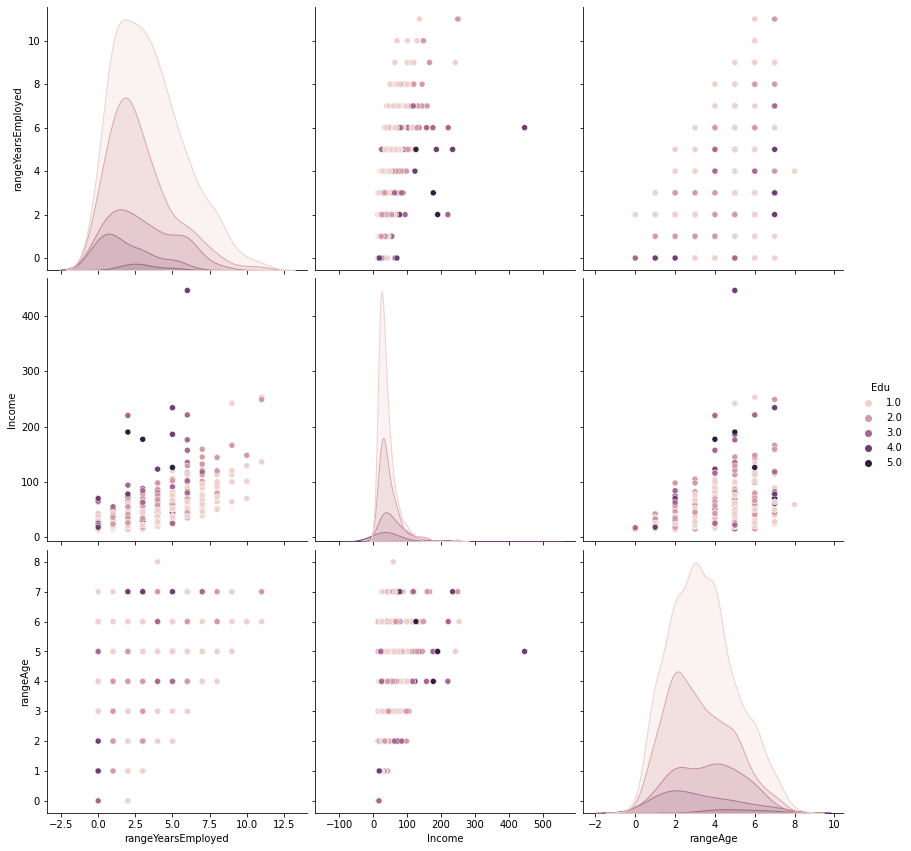

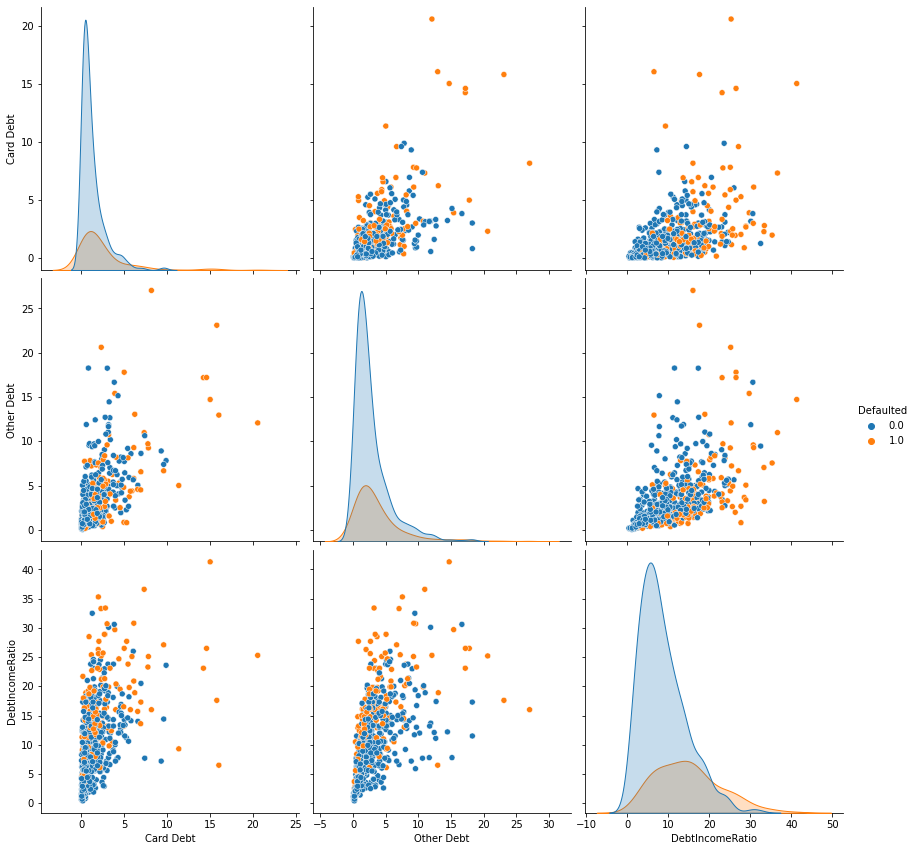

In [279]:
sns.pairplot(df.dropna(), hue='Edu',size=4,vars=["rangeYearsEmployed","Income","rangeAge"],kind='scatter');
sns.pairplot(df.dropna(), hue='Defaulted',size=4,vars=["Card Debt","Other Debt","DebtIncomeRatio"],kind='scatter');

# Creacion de agrupaciones basandose en el grafo anterior

In [280]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dfprocessed)

KMeans(n_clusters=3)

# Visualizacion de agrupaciones recien creadas

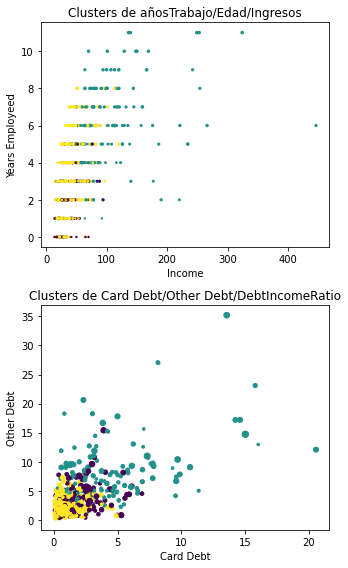

In [282]:
# Save the cluster labels to the dataframe 
fig, axes = plt.subplots(2,1, figsize=(5,8))
df['cluster'] = kmeans.labels_
# Visualize the clusters
axes[0].scatter(df['Income'], df['rangeYearsEmployed'], df['rangeAge'], c = df['cluster'])
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Years Employeed')
axes[0].set_title('Clusters de añosTrabajo/Edad/Ingresos')

# Visualize the clusters
axes[1].scatter(df["Card Debt"], df["Other Debt"], df["DebtIncomeRatio"], c = df['cluster'])
axes[1].set_xlabel('Card Debt')
axes[1].set_ylabel('Other Debt')
axes[1].set_title('Clusters de Card Debt/Other Debt/DebtIncomeRatio')

plt.tight_layout();

# Ejemplo Clustering metrics

In [290]:
from sklearn.metrics import silhouette_score

varM = df['Defaulted'].mean(skipna=True)
df['Defaulted']=df['Defaulted'].fillna(varM) 
df0=df[['Income','rangeYearsEmployed','rangeAge','Edu']]
df1=df[["Card Debt","Other Debt","DebtIncomeRatio","Defaulted"]]
print(df0.head())
print(df1.head())


   Income  rangeYearsEmployed  rangeAge  Edu
0    19.0                 2.0       5.0  2.0
1   100.0                 9.0       6.0  1.0
2    57.0                 4.0       3.0  2.0
3    19.0                 2.0       2.0  2.0
4   253.0                11.0       6.0  1.0
   Card Debt  Other Debt  DebtIncomeRatio  Defaulted
0      0.124       1.073              6.3   0.261429
1      4.582       8.218             12.8   0.261429
2      6.111       5.802             20.9   1.000000
3      0.681       0.516              6.3   0.261429
4      9.308       8.908              7.2   0.261429


In [291]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df0 = scaler.fit_transform(df0)
scaled_df1 = scaler.fit_transform(df1)


# Metodo del codo (elbow method)

(DF0) Se puede apreciar el "codo", en el punto (3,1050) aprox de los ejes x,y
(DF1) Se puede apreciar el "codo", en el punto (3,1050) aprox de los ejes x,y


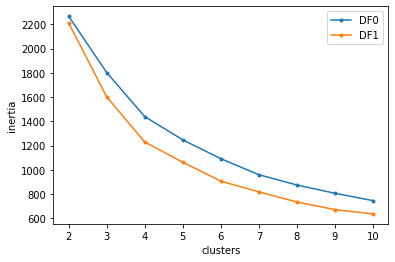

In [292]:
#Cracion de lista de inercias
inertias = []
# Ciclo for entre 2 y 10, va agregando (append) valores a la lista de inercias
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df0)  
    inertias.append(kmeans.inertia_)
#Visualizacion de registros
plt.plot(range(2,11), inertias, marker = '.',label='DF0')
plt.legend(loc="upper right")
plt.xlabel('clusters')
plt.ylabel('inertia');
print('(DF0) Se puede apreciar el "codo", en el punto (3,1050) aprox de los ejes x,y')


inertias = []
# Ciclo for entre 2 y 10, va agregando (append) valores a la lista de inercias
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df1)  
    inertias.append(kmeans.inertia_)
#Visualizacion de registros
plt.plot(range(2,11), inertias, marker = '.',label='DF1')
plt.legend(loc="upper right")
plt.xlabel('clusters')
plt.ylabel('inertia');
print('(DF1) Se puede apreciar el "codo", en el punto (3,1050) aprox de los ejes x,y')

*vemos que el gráfico comienza para nivelarse en 3 clústeres.  Esto se parece a la curva de un brazo, por lo que se llama "codo". Por lo tanto, el 3 sería un candidato para un buen número de clústeres*

# Puntuacion de silueta

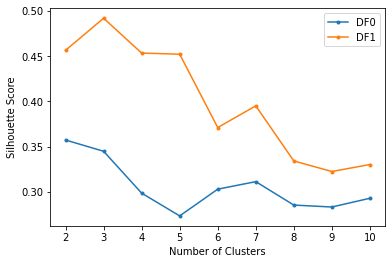

In [299]:
#Cracion de lista de silueta
silhouette_scores = []
# Ciclo for entre 2 y 10, va agregando (append) valores a la lista de silueta
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df0)
  silhouette_scores.append(silhouette_score(scaled_df0, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.',label='DF0')
plt.legend(loc="upper right")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');


#Cracion de lista de silueta
silhouette_scores = []
# Ciclo for entre 2 y 10, va agregando (append) valores a la lista de silueta
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df1)
  silhouette_scores.append(silhouette_score(scaled_df1, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.',label='DF1')
plt.legend(loc="upper right")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');


*De acuerdo con el trazado anterior, ¿cuál es el mejor número de clústeres para estos datos? (¡Recuerden que entre más sean altas las puntuaciones de silueta, mejor!) Podemos ver del trazado anterior que 2 sería el mejor número de clústeres para nuestros datos debido a que tiene la puntuación de silueta más alta.*

In [300]:
# Ajuste el modelo kmeans con 2 cluster y muestra la puntuación de la silueta
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df0)
print(silhouette_score(scaled_df0, kmeans.labels_))

kmeans.fit(scaled_df1)
print(silhouette_score(scaled_df1, kmeans.labels_))



0.3572584894641623
0.4562848221453086


*Para este ejemplo, la puntuación de silueta nos da una diferente sugerencia para el agrupamiento que el trazado de codo de inercias.  Recuerden, no existe una manera precisa de determinar el mejor número de clústeres.  Visualicemos los clústeres 2 y 3 para ver si podemos determinar el mejor clúster visualmente.*

In [301]:
# Se adapta a 2 modelos de KMeans diferentes, uno con 2 cluster y otro con 3 cluster
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df0)
kmeans3.fit(scaled_df0)

kmeans4 = KMeans(n_clusters = 2)
kmeans5 = KMeans(n_clusters = 3)
kmeans4.fit(scaled_df1)
kmeans5.fit(scaled_df1)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

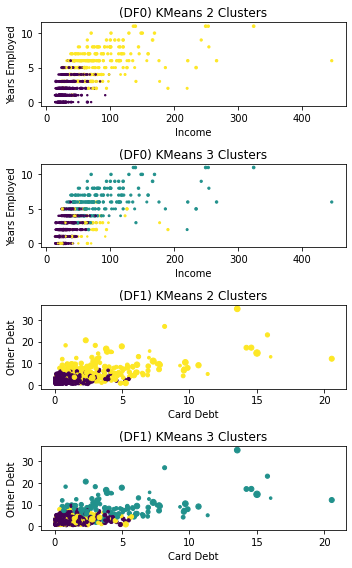

In [302]:
# Guarde las etiquetas del clúster en df
df0['cluster2'] = kmeans2.labels_
df0['cluster3'] = kmeans3.labels_

df1['cluster4'] = kmeans4.labels_
df1['cluster5'] = kmeans5.labels_
# Visualizacion de los clusters
fig, axes = plt.subplots(4,1, figsize=(5,8))
axes[0].scatter(df0['Income'], df0['rangeYearsEmployed'],df0['rangeAge'], c = df0['cluster2'])
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Years Employed')
axes[0].set_title('(DF0) KMeans 2 Clusters')

axes[1].scatter(df0['Income'], df0['rangeYearsEmployed'],df0['rangeAge'], c = df0['cluster3'])
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Years Employed')
axes[1].set_title('(DF0) KMeans 3 Clusters')

axes[2].scatter(df1["Card Debt"], df1["Other Debt"],df1["DebtIncomeRatio"], c = df1['cluster4'])
axes[2].set_xlabel('Card Debt')
axes[2].set_ylabel('Other Debt')
axes[2].set_title('(DF1) KMeans 2 Clusters')

axes[3].scatter(df1["Card Debt"], df1["Other Debt"],df1["DebtIncomeRatio"], c = df1['cluster5'])
axes[3].set_xlabel('Card Debt')
axes[3].set_ylabel('Other Debt')
axes[3].set_title('(DF1) KMeans 3 Clusters')
plt.tight_layout();

